# Import packages

In [1]:
import pandas as pd
import ast
from geopy.distance import geodesic
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
import ml_help
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plot_label="Volume"
YONGE_LOCS_MIDDLE_POINT = (43.693963, -79.395695)

In [2]:
inci_df = pd.read_csv("../analysis/050_incidents/050_incidents.csv.zip")
inci_df["collectedAt"] = pd.to_datetime(inci_df["collectedAt"], utc=True)
inci_df["collectedAt"] = inci_df["collectedAt"].dt.floor(freq="s")
inci_df.head()

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,close_to_yonge_detector,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Rename close_to_yonge_detector for future merge with count dataframe

In [3]:
inci_df.rename({"close_to_yonge_detector": "location"},inplace=True,axis=1)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


In [4]:
inci_df["events"] = inci_df["events"].apply(lambda x: ast.literal_eval(x))
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"[{'code': 108, 'description': 'Backed up traff...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
3,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"[{'code': 500, 'description': 'Lane closed', '...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
4,9.0,0.0,Lower Jarvis St (Lake Shore Blvd/Harbour St),ON-11/Yonge St (Lake Shore Blvd/Harbour St),152.120600,0.0,"[{'code': 701, 'description': 'Roadworks', 'ic...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
31614,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
31615,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
31616,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"[{'code': 115, 'description': 'Slow traffic', ...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
31617,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"[{'code': 101, 'description': 'Stopped traffic...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Break events in one new row per event

In [5]:
inci_df = inci_df.explode("events").reset_index()
inci_df.drop("index", axis=1, inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,from,to,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,Gardiner Expy/Lake Shore Blvd (ON-11A),Front St (ON-11A),372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,Front St (Yonge St/ON-11),ON-2/Lake Shore Blvd (Yonge St/ON-11),302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,Hwy-11A/York St (Queens Quay),Hwy-11/Yonge St (Queens Quay),273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,Church St/Front St E (Wellington St),Bay St (Wellington St),254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,Queen St E (Yonge St/ON-11),Front St (Yonge St/ON-11),442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,Dunn Ave/Jameson Ave (ON-2),ON-11A/Lower Simcoe St/Yonge St (ON-2),2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,Front St (Yonge St/ON-11),Queens Quay (Yonge St/ON-11),472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,Yonge St. exit [154],Yonge St,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- I don't need "from" and "to" because I have already flagged each incident as being close to either Yonge and/or Gardiner

In [6]:
inci_df.drop(columns=["from","to"],inplace=True)
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,location,close_to_gardiner_detector
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG
...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG


- Getting event description from "events"

In [7]:
inci_df["event_description"] = inci_df["events"].apply(lambda x: x['description'])
inci_df

,iconCategory,magnitudeOfDelay,length,delay,events,collectedAt,location,close_to_gardiner_detector,event_description
0,6.0,2.0,372.918000,199.0,"{'code': 108, 'description': 'Backed up traffi...",2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,7.0,0.0,302.765346,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,7.0,0.0,302.765346,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,9.0,0.0,273.828235,0.0,"{'code': 701, 'description': 'Roadworks', 'ico...",2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,7.0,0.0,254.244867,0.0,"{'code': 500, 'description': 'Lane closed', 'i...",2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...,...,...
40632,6.0,1.0,442.750186,165.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,6.0,1.0,2461.341117,127.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,6.0,1.0,472.289662,158.0,"{'code': 115, 'description': 'Slow traffic', '...",2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,6.0,3.0,432.591314,136.0,"{'code': 101, 'description': 'Stopped traffic'...",2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Dropping "iconCategory" and "events" in favour of more detailed "event_description"

In [8]:
inci_df.drop(["iconCategory", "events"], axis=1, inplace=True)
inci_df

,magnitudeOfDelay,length,delay,collectedAt,location,close_to_gardiner_detector,event_description
0,2.0,372.918000,199.0,2022-07-14 12:45:00+00:00,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic
1,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed
2,0.0,302.765346,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks
3,0.0,273.828235,0.0,2022-07-14 12:45:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks
4,0.0,254.244867,0.0,2022-07-14 12:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed
...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,2023-03-26 21:00:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic
40633,1.0,2461.341117,127.0,2023-03-26 21:25:00+00:00,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic
40634,1.0,472.289662,158.0,2023-03-26 21:30:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic
40635,3.0,432.591314,136.0,2023-03-26 21:45:00+00:00,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic


- Expand collectedAt for future merge

In [9]:
inci_df["month"] = inci_df.collectedAt.dt.month
inci_df["day_of_week"] = inci_df.collectedAt.dt.weekday
inci_df["hour"] = inci_df.collectedAt.dt.hour
inci_df["minute"] = inci_df.collectedAt.dt.minute
inci_df.drop("collectedAt",inplace=True,axis=1)
inci_df

,magnitudeOfDelay,length,delay,location,close_to_gardiner_detector,event_description,month,day_of_week,hour,minute
0,2.0,372.918000,199.0,FRONT ST AT YONGE ST (PX 29),FAR,Backed up traffic,7,3,12,45
1,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Lane closed,7,3,12,45
2,0.0,302.765346,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Roadworks,7,3,12,45
3,0.0,273.828235,0.0,THE ESPLANADE AT YONGE ST (PX 2345),FAR,Roadworks,7,3,12,45
4,0.0,254.244867,0.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Lane closed,7,3,12,45
...,...,...,...,...,...,...,...,...,...,...
40632,1.0,442.750186,165.0,WELLINGTON ST AT YONGE ST (PX 30),FAR,Slow traffic,3,6,21,0
40633,1.0,2461.341117,127.0,THE ESPLANADE AT YONGE ST (PX 2345),DW0040DWG,Slow traffic,3,6,21,25
40634,1.0,472.289662,158.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DWG,Slow traffic,3,6,21,30
40635,3.0,432.591314,136.0,WELLINGTON ST AT YONGE ST (PX 30),DE0020DEG,Stopped traffic,3,6,21,45


- Load Yonge count data set

In [10]:
count_df = pd.read_csv("./data/yonge_count.csv.zip")
count_df["time"] = pd.to_datetime(count_df["time"], utc=True)
count_df.rename({"time": "collectedAt"},inplace=True,axis=1)
count_df

,location,collectedAt,total_count,hour,minute,month,day,day_of_week,dist_from_mid_point,is_north_from_mid_point
0,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 07:45:00+00:00,984,7,45,March,3,Tuesday,3.499076,1
1,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:00:00+00:00,1046,8,0,March,3,Tuesday,3.499076,1
2,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:15:00+00:00,1034,8,15,March,3,Tuesday,3.499076,1
3,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:30:00+00:00,1032,8,30,March,3,Tuesday,3.499076,1
4,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:45:00+00:00,934,8,45,March,3,Tuesday,3.499076,1
...,...,...,...,...,...,...,...,...,...,...
8379,MERTON ST AT YONGE ST,2022-08-24 17:00:00+00:00,468,17,0,August,24,Wednesday,0.243920,1
8380,MERTON ST AT YONGE ST,2022-08-24 17:15:00+00:00,478,17,15,August,24,Wednesday,0.243920,1
8381,MERTON ST AT YONGE ST,2022-08-24 17:30:00+00:00,422,17,30,August,24,Wednesday,0.243920,1
8382,MERTON ST AT YONGE ST,2022-08-24 17:45:00+00:00,436,17,45,August,24,Wednesday,0.243920,1


- Drop unused columns

In [11]:
count_df.drop(["hour","minute","month","day","day_of_week"],inplace=True,axis=1)
count_df

,location,collectedAt,total_count,dist_from_mid_point,is_north_from_mid_point
0,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 07:45:00+00:00,984,3.499076,1
1,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:00:00+00:00,1046,3.499076,1
2,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:15:00+00:00,1034,3.499076,1
3,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:30:00+00:00,1032,3.499076,1
4,LAWRENCE AVE AT YONGE ST (PX 55),2020-03-03 08:45:00+00:00,934,3.499076,1
...,...,...,...,...,...
8379,MERTON ST AT YONGE ST,2022-08-24 17:00:00+00:00,468,0.243920,1
8380,MERTON ST AT YONGE ST,2022-08-24 17:15:00+00:00,478,0.243920,1
8381,MERTON ST AT YONGE ST,2022-08-24 17:30:00+00:00,422,0.243920,1
8382,MERTON ST AT YONGE ST,2022-08-24 17:45:00+00:00,436,0.243920,1


- Expand collectedAt for merge with incidents dataframe

In [12]:
count_df["month"] = count_df.collectedAt.dt.month
count_df["day_of_week"] = count_df.collectedAt.dt.weekday
count_df["hour"] = count_df.collectedAt.dt.hour
count_df["minute"] = count_df.collectedAt.dt.minute
count_df.drop("collectedAt",inplace=True,axis=1)
count_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45
...,...,...,...,...,...,...,...,...
8379,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0
8380,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15
8381,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30
8382,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45


- Merge incidents and data set with location and distance

In [13]:
count_inci_df = pd.merge(count_df, inci_df, on=["month", "day_of_week", "hour", "minute", "location"], how="left")
count_inci_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,close_to_gardiner_detector,event_description
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,NaN,NaN,NaN
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,NaN,NaN,NaN,NaN,NaN
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15,NaN,NaN,NaN,NaN,NaN
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30,NaN,NaN,NaN,NaN,NaN
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0,NaN,NaN,NaN,NaN,NaN
8391,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15,NaN,NaN,NaN,NaN,NaN
8392,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30,NaN,NaN,NaN,NaN,NaN
8393,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45,NaN,NaN,NaN,NaN,NaN


- Drop close_to_gardiner_detector because I am working with Yonge locations

In [14]:
count_inci_df.drop("close_to_gardiner_detector",inplace=True,axis=1)
count_inci_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,event_description
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,NaN,NaN,NaN,NaN
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,NaN,NaN,NaN,NaN
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15,NaN,NaN,NaN,NaN
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30,NaN,NaN,NaN,NaN
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8390,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0,NaN,NaN,NaN,NaN
8391,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15,NaN,NaN,NaN,NaN
8392,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30,NaN,NaN,NaN,NaN
8393,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45,NaN,NaN,NaN,NaN


- Fill missing values

In [15]:
count_inci_df["magnitudeOfDelay"].fillna(0,inplace=True)
count_inci_df["length"].fillna(0,inplace=True)
count_inci_df["delay"].fillna(0,inplace=True)
count_inci_df["event_description"].fillna("No incidents",inplace=True)
count_inci_df

,location,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,event_description
0,LAWRENCE AVE AT YONGE ST (PX 55),984,3.499076,1,3,1,7,45,0.0,0.0,0.0,No incidents
1,LAWRENCE AVE AT YONGE ST (PX 55),1046,3.499076,1,3,1,8,0,0.0,0.0,0.0,No incidents
2,LAWRENCE AVE AT YONGE ST (PX 55),1034,3.499076,1,3,1,8,15,0.0,0.0,0.0,No incidents
3,LAWRENCE AVE AT YONGE ST (PX 55),1032,3.499076,1,3,1,8,30,0.0,0.0,0.0,No incidents
4,LAWRENCE AVE AT YONGE ST (PX 55),934,3.499076,1,3,1,8,45,0.0,0.0,0.0,No incidents
...,...,...,...,...,...,...,...,...,...,...,...,...
8390,MERTON ST AT YONGE ST,468,0.243920,1,8,2,17,0,0.0,0.0,0.0,No incidents
8391,MERTON ST AT YONGE ST,478,0.243920,1,8,2,17,15,0.0,0.0,0.0,No incidents
8392,MERTON ST AT YONGE ST,422,0.243920,1,8,2,17,30,0.0,0.0,0.0,No incidents
8393,MERTON ST AT YONGE ST,436,0.243920,1,8,2,17,45,0.0,0.0,0.0,No incidents


- Drop location column because it will not be used anymore

In [16]:
count_inci_df.drop(["location"],inplace=True,axis=1)
count_inci_df["dist_from_mid_point"].fillna(-1,inplace=True)
count_inci_df

,total_count,dist_from_mid_point,is_north_from_mid_point,month,day_of_week,hour,minute,magnitudeOfDelay,length,delay,event_description
0,984,3.499076,1,3,1,7,45,0.0,0.0,0.0,No incidents
1,1046,3.499076,1,3,1,8,0,0.0,0.0,0.0,No incidents
2,1034,3.499076,1,3,1,8,15,0.0,0.0,0.0,No incidents
3,1032,3.499076,1,3,1,8,30,0.0,0.0,0.0,No incidents
4,934,3.499076,1,3,1,8,45,0.0,0.0,0.0,No incidents
...,...,...,...,...,...,...,...,...,...,...,...
8390,468,0.243920,1,8,2,17,0,0.0,0.0,0.0,No incidents
8391,478,0.243920,1,8,2,17,15,0.0,0.0,0.0,No incidents
8392,422,0.243920,1,8,2,17,30,0.0,0.0,0.0,No incidents
8393,436,0.243920,1,8,2,17,45,0.0,0.0,0.0,No incidents


# Plot correlations
- Between speed, day of week, hour, magnitude of delay, length, delay

- Break collectedAt into needed fields

In [18]:
data_to_correlate = count_inci_df[["total_count","day_of_week","hour","dist_from_mid_point","magnitudeOfDelay","length","delay"]]
corr_mat = data_to_correlate.corr()
corr_mat

,total_count,day_of_week,hour,dist_from_mid_point,magnitudeOfDelay,length,delay
total_count,1.000000,0.005063,0.199646,0.228263,0.020171,0.006746,0.019729
day_of_week,0.005063,1.000000,0.000984,0.016152,0.038780,0.030017,0.047083
hour,0.199646,0.000984,1.000000,0.001685,0.043710,0.030403,0.050408
dist_from_mid_point,0.228263,0.016152,0.001685,1.000000,0.109848,0.053883,0.102587
magnitudeOfDelay,0.020171,0.038780,0.043710,0.109848,1.000000,0.363927,0.796640
length,0.006746,0.030017,0.030403,0.053883,0.363927,1.000000,0.687271
delay,0.019729,0.047083,0.050408,0.102587,0.796640,0.687271,1.000000


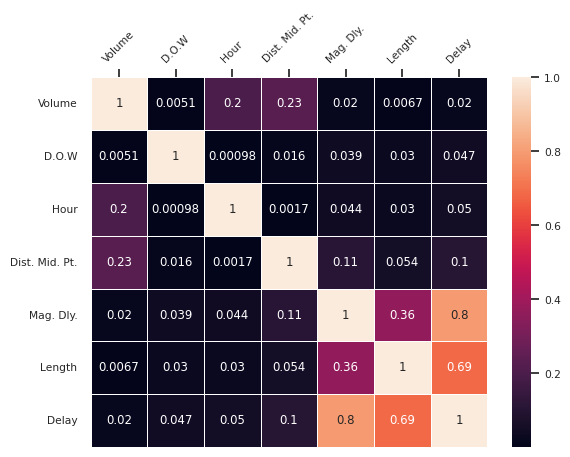

In [19]:
labels=["Volume", "D.O.W", "Hour", "Dist. Mid. Pt.", "Mag. Dly.", "Length", "Delay"]

sns.set(font_scale=0.7)
ax = sns.heatmap(corr_mat.to_numpy(),annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/110_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/110_correlations.png", bbox_inches="tight")

# Onehot encode categorical attributes
- Also cast all fields to float32

In [20]:
categorical_attrs = ["month","day_of_week", "event_description"]

transformed_df = pd.get_dummies(count_inci_df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df

,total_count,dist_from_mid_point,is_north_from_mid_point,hour,minute,magnitudeOfDelay,length,delay,month_1,month_2,...,day_of_week_3,day_of_week_5,event_description_Backed up traffic,event_description_Demonstration,event_description_No incidents,event_description_Obstruction on the road,event_description_Roadworks,event_description_Slow traffic,event_description_Stopped traffic,event_description_Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1034.0,3.499076,1.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1032.0,3.499076,1.0,8.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,934.0,3.499076,1.0,8.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8390,468.0,0.243920,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8391,478.0,0.243920,1.0,17.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8392,422.0,0.243920,1.0,17.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8393,436.0,0.243920,1.0,17.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
transformed_df.to_csv("./data/yonge_count_incidents.csv.zip", index=False, compression="zip")